In [2]:
import numpy as np
import math
import graphviz as gv

def adjlShow(L, labels=None, Dirigido=False, Peso=False, Camino=[],
             CaminoSimple=True,
             layout="sfdp"):
  Grafo = gv.Digraph("G") if Dirigido else gv.Graph("G")

  n = len(L)
  for u in range(n):
    Grafo.node(str(u), labels[u] if labels else str(u))
  Anadir = set()
  Camino = enumerate(Camino) if CaminoSimple else Camino
  for v, u in Camino:
    if u != -1:
      if Peso:
        for vi, w in L[u]:
          if vi == v:
            break
        Grafo.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        Grafo.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      Anadir.add(f"{u},{v}")
      Anadir.add(f"{v},{u}")
  if Peso:
    for u in range(n):
      for v, w in L[u]:
        if not Dirigido and not f"{u},{v}" in Anadir:
          Anadir.add(f"{u},{v}")
          Anadir.add(f"{v},{u}")
          Grafo.edge(str(u), str(v), str(w))
        elif Dirigido:
          Grafo.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not Dirigido and not f"{u},{v}" in Anadir:
          Anadir.add(f"{u},{v}")
          Anadir.add(f"{v},{u}")
          Grafo.edge(str(u), str(v))
        elif Dirigido:
          Grafo.edge(str(u), str(v))
  return Grafo
def floydWarshall(G):
    n = len(G)
    cost = np.full((n, n), math.inf)
    path = np.full((n, n), -1, dtype=int)

    for u in range(n):
        for v, w in G[u]:
            cost[u, v] = w
            path[u, v] = u

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i != j and j != k and k != i:
                    f = cost[i, k] + cost[k, j]
                    if f < cost[i, j]:
                        cost[i, j] = f
                        path[i, j] = path[k, j]

    return cost, path

In [10]:
%%file Prueba.al
1 84 4 23
3 62 2 34 6 85
1 54 5 90
2 50
6 89
1 14 3 91
5 4 7 53
6 32

Overwriting Prueba.al


In [11]:
with open("Prueba.al") as f:
  G = []
  for line in f:
    if line == '-\n':
      G.append([])
    else:
      nums = [int(x) for x in line.split()]
      G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

  for x in G:
    print(x)

[(1, 84), (4, 23)]
[(3, 62), (2, 34), (6, 85)]
[(1, 54), (5, 90)]
[(2, 50)]
[(6, 89)]
[(1, 14), (3, 91)]
[(5, 4), (7, 53)]
[(6, 32)]


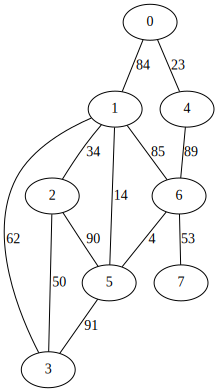

In [12]:
adjlShow(G, Peso=True, layout="neato")


In [20]:
Costo, Camino = floydWarshall(G)
print(Costo)
print(Camino)

[[ inf  84. 118. 146.  23. 116. 112. 165.]
 [ inf  inf  34.  62.  inf  89.  85. 138.]
 [ inf  54.  inf 116.  inf  90. 139. 192.]
 [ inf 104.  50.  inf  inf 140. 189. 242.]
 [ inf 107. 141. 169.  inf  93.  89. 142.]
 [ inf  14.  48.  76.  inf  inf  99. 152.]
 [ inf  18.  52.  80.  inf   4.  inf  53.]
 [ inf  50.  84. 112.  inf  36.  32.  inf]]
[[-1  0  1  1  0  6  4  6]
 [-1 -1  1  1 -1  6  1  6]
 [-1  2 -1  1 -1  2  1  6]
 [-1  2  3 -1 -1  2  1  6]
 [-1  5  1  1 -1  6  4  6]
 [-1  5  1  1 -1 -1  1  6]
 [-1  5  1  1 -1  6 -1  6]
 [-1  5  1  1 -1  6  7 -1]]


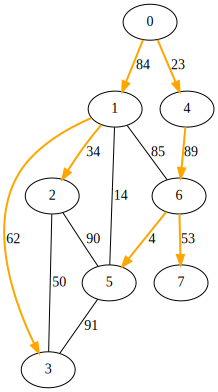

In [25]:
adjlShow(G, Peso=True, Camino=Camino[0], layout="neato")
